# Movie Rating Predicition
## IMDb India Movies

### 1. Introduction - Loading and Exploring the Data

In [1857]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing important libraries

In [1859]:
movies_data = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1") 
# Loading the dataset

In [1861]:
movies_data.head()         # First five rows of the dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


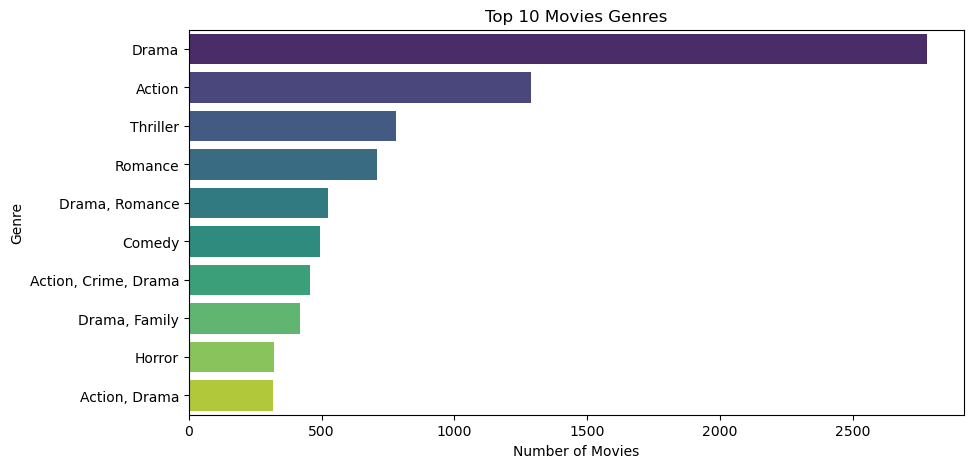

In [1863]:
# Dataset Overview
plt.figure(figsize=(10,5))

# Getting the top 10 Genres
top_genres = movies_data["Genre"].value_counts().head(10)

# Plotting the countplot
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Movies Genres")
plt.show()

### Drama is the most common Genre with highest number of movies from first 10 Movies.

In [1866]:
movies_data.info()       # For Categorical Summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### After going through the Categorical summary and first few columns of data, we come to know that votes column should have integer data type.

In [1869]:
# Function to clean and convert Votes Column correctly
def clean_votes(value):
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace("$", "").replace(",", "").strip()  # Removing commas and $ symbols and extra spaces
        if "M" in value:  
            return float(value.replace("M", "")) * 1_000_000  # Converting M to Millions
        elif "K" in value:  
            return float(value.replace("K", "")) * 1_000  # Converting K to Thousands
    return pd.to_numeric(value, errors="coerce")  # Converting remaining to number

# Apply function to "Votes" column
movies_data["Votes"] = movies_data["Votes"].apply(clean_votes)

In [1870]:
# Converting to integer type 
movies_data["Votes"] = movies_data["Votes"].astype("Int64")

In [1873]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   Int64  
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: Int64(1), float64(1), object(8)
memory usage: 1.2+ MB


In [1875]:
movies_data.describe()     # For Statistical Summary of Numerical Columns

,Rating,Votes
count,7919.000000,7920.0
mean,5.841621,2589.790783
std,1.381777,59109.151257
min,1.100000,5.0
25%,4.900000,16.0
50%,6.000000,55.0
75%,6.800000,404.0
max,10.000000,5160000.0


In [1877]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,<NA>,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,<NA>,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,<NA>,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [1879]:
movies_data.shape

(15509, 10)

### 10 columns, 15509 rows/ entries

### 2. Data Preprocessing - Handling Missing Values

In [1883]:
print(movies_data.isnull().sum())
# Checking the missing values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [1885]:
null_percentage = (movies_data.isnull().sum() / len(movies_data)) * 100
# Missing values percentage

print(null_percentage)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


### Handling the missing values based on the null_percentage
- Year - 3.4044% - Can be replaced with the mode value

In [1888]:
movies_data["Year"] = movies_data["Year"].astype(str).str.extract(r"(\d{4})").astype("float")

In [1890]:
movies_data["Year"].fillna(movies_data["Year"].mode()[0], inplace = True)

- Duration - 53.3174% - Has high null Percentage
- Since Duration varies by Genre, we will fill it with Genre's median

In [1893]:
movies_data["Duration"] = movies_data["Duration"].str.extract("(\d+)")    # Extracting Numbers
movies_data["Duration"] = pd.to_numeric(movies_data["Duration"], errors="coerce")  # Converting to numeric
movies_data["Duration"] = movies_data.groupby("Genre")["Duration"].transform(lambda x: x.fillna(x.median()))

- Genre - 12.1026% - Replacing with mode

In [1896]:
movies_data["Genre"].fillna(movies_data["Genre"].mode()[0], inplace = True)

- Rating and Votes Column - Important for Prediction
- We will replace the values using grouped median

In [1899]:
movies_data["Rating"] = movies_data.groupby("Genre")["Rating"].transform(lambda x: x.fillna(x.median()))


In [1901]:
movies_data["Votes"] = movies_data.groupby("Genre")["Votes"].transform(lambda x: x.fillna(int(x.median())) if not x.dropna().empty else x)

- Director and Actors Column - Replacing with "Unknown" 

In [1904]:
movies_data["Director"].fillna("Unknown", inplace=True)
movies_data["Actor 1"].fillna("Unknown", inplace=True)
movies_data["Actor 2"].fillna("Unknown", inplace=True)
movies_data["Actor 3"].fillna("Unknown", inplace=True)

In [1906]:
# Checking the missing values again
movies_data.isnull().sum()

Name           0
Year           0
Duration    1939
Genre          0
Rating        71
Votes         71
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [1908]:
# dropping the remaining null values
movies_data = movies_data.dropna(subset=["Duration","Rating","Votes"])

In [1910]:
movies_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [1912]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019.0,121.0,Drama,6.5,24,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.7,110,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.5,24,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [1914]:
# Converting the datatype of Year from float to int
movies_data["Year"] = movies_data["Year"].astype("int")

In [1916]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,121.0,Drama,6.5,24,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",6.7,110,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,6.5,24,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


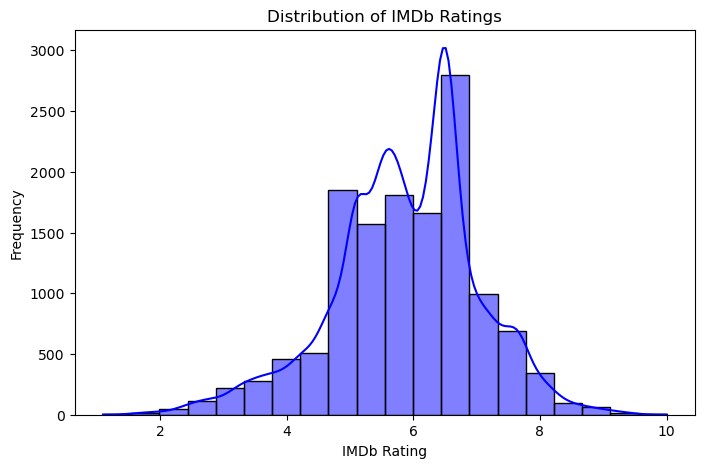

In [1918]:
# Rating Distribution
plt.figure(figsize=(8,5))

# Plotting the histogram
sns.histplot(movies_data["Rating"], bins=20, kde=True, color="blue")

plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.title("Distribution of IMDb Ratings")
plt.show()

### From the histogram we can infer that most movies have ratings between 5 and 7 indicating that majority of movies in the dataset are rated in this range.

In [1921]:
movies_data.replace(" ", np.nan, inplace=True)  # Converting the blank spaces to NAN
movies_data.dropna(inplace=True) # Dropping rows with missing values
# Dropping the (Name, Actor 1, Actor 2, Actor 3) columns to avoid errors as it will not add much value to the model
movies_data.drop(columns=["Name", "Actor 1", "Actor 2", "Actor 3"], inplace=True, errors="ignore")

In [1923]:
# Saving the file
movies_data.to_csv("movies_data.csv", index=False)

### 3. Encoding Categorical Variables

In [1926]:
from sklearn.preprocessing import LabelEncoder

In [1928]:
# Applying Label Encoding
categorical_cols = ["Director","Genre"] 

In [1930]:
for col in categorical_cols:
    encoder = LabelEncoder()  #Creating a new LabelEncoder for each column
    movies_data[col] = encoder.fit_transform(movies_data[col].astype(str))

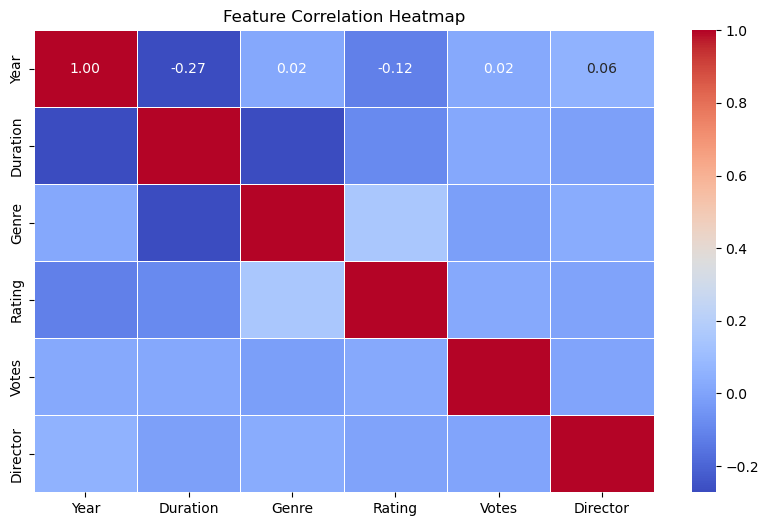

In [1932]:
# Correlation Heatmap
plt.figure(figsize=(10,6))

numeric_movies_data = movies_data.select_dtypes(include=["number"])   # For keeping only numeric columns

# Plotting the heatmap
sns.heatmap(numeric_movies_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths= 0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

### Votes and Rating have a weak correlation - Higher votes don't necessarily mean a higher rating.
### Year and Duration have a slightly negative correlation - Newer movies tend to have shorter durations.

### 4. Feature Engineering

In [1936]:
# Director Success Rate
movies_data["Director"] = movies_data.groupby("Director")["Rating"].transform("mean")

In [1938]:
# Genre Success Rate
movies_data["Genre"] = movies_data.groupby("Genre")["Rating"].transform("mean")

In [1940]:
# Votes Success Rate
movies_data["Votes"] = movies_data.groupby("Votes")["Rating"].transform("mean")

In [1942]:
# Yearly Success Rate
movies_data["Year"] = movies_data.groupby("Year")["Rating"].transform("mean")

In [1944]:
# Duration Success Rate
movies_data["Duration"] = movies_data.groupby("Duration")["Rating"].transform("mean")

### 5. Splitting Data for Training

In [1947]:
from sklearn.model_selection import train_test_split

In [1949]:
# Selecting features and target variables
x = movies_data.drop(columns=["Rating"])   #  Features
y = movies_data["Rating"]     # Target

In [1951]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

### 6. Model Training - Training the Model

In [1954]:
from sklearn.ensemble import RandomForestRegressor

In [1956]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### 7. Model Evaluation - Evaluating the model

In [1958]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1959]:
# Making Predictions
y_pred = model.predict(x_test)

In [1960]:
# Evaluating the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test,y_pred, squared=False))
print("R^2 Score:", r2_score(y_test, y_pred))

MAE: 0.3406218565088766
RMSE: 0.6018923728805714
R^2 Score: 0.7259710372705481


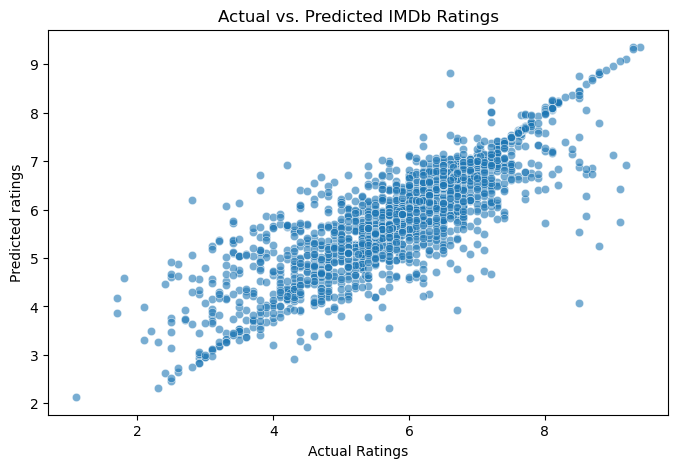

In [1961]:
# Predicted vs Actual Ratings 
plt.figure(figsize=(8,5))

# Plotting the scatterplot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted ratings")
plt.title("Actual vs. Predicted IMDb Ratings")
plt.show()

### The Scatterplot shows a positive correlation between actual and predicted IMDb ratings, indicating the model captures some trends.

### 8. Saving the Model

In [1968]:
import joblib
joblib.dump(model, "Movie_Rating_Predictor.pkl")

['Movie_Rating_Predictor.pkl']

### 9. Prediction on New Data

In [1853]:
model = joblib.load("Movie_Rating_Predictor.pkl")
# Loading the trained model

# Getting User Input
print("Enter the following movie details to predict it's rating:")
Genre = str(input("Genre:"))
Director = str(input("Director:"))
Votes = int(input("Votes:"))
Year = int(input("Year:"))
Duration = float(input("Duration:"))

movies_data = pd.read_csv("movies_data.csv")

# Applying the same groupby transformations as during training
Director_mean = movies_data.groupby("Director")["Rating"].transform("mean")
Genre_mean = movies_data.groupby("Genre")["Rating"].transform("mean")
Votes_mean = movies_data.groupby("Votes")["Rating"].transform("mean")
Year_mean = movies_data.groupby("Year")["Rating"].transform("mean")
Duration_mean = movies_data.groupby("Duration")["Rating"].transform("mean")

# Creating DataFrame for new input 
new_data = pd.DataFrame({
    "Genre": [Genre_mean.get(Genre, movies_data["Rating"].mean())],
    "Director": [Director_mean.get(Director, movies_data["Rating"].mean())],
    "Votes": [Votes_mean.get(Votes, movies_data["Rating"].mean())],
    "Year": [Year_mean.get(Year, movies_data["Rating"].mean())],
    "Duration": [Duration_mean.get(Duration, movies_data["Rating"].mean())]
})

new_data = new_data[x_train.columns]

for col in x_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Making prediction
predicted_rating = model.predict(new_data)
print(f"\n Predicted Movie Rating: {predicted_rating[0]: .2f}")

Enter the following movie details to predict it's rating:


Genre: Comedy
Director: Ovais Khan
Votes: 35
Year: 2019
Duration: 110.0



 Predicted Movie Rating:  5.00
